## <u> Implementing Multiple Linear Regression </u>

### <u> Objective </u>
* ### To predict the profit made by a startup on the basis of expenses incurred and the state where they operate

In [1]:
# Importing the libraries
# we need to import libraries to work with the dataframe

import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

<ipython-input-1-2e9a68f2b404>:6: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  from numpy import math


In [2]:
# Loading the dataset

dataset = pd.read_csv('50_Startups.csv')

In [3]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


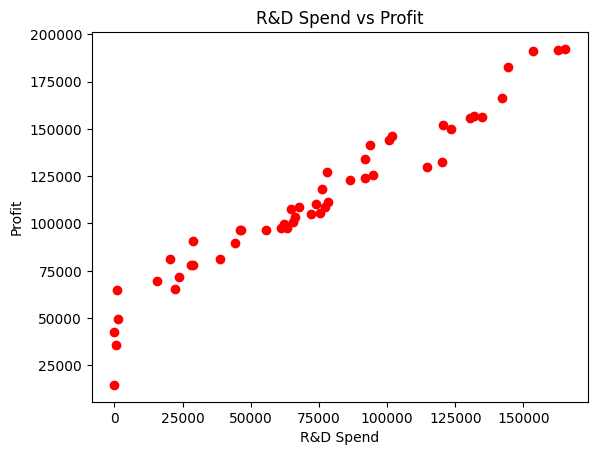

In [4]:
plt.scatter(dataset['R&D Spend'], dataset['Profit'], color = 'red')

plt.title('R&D Spend vs Profit')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.show()


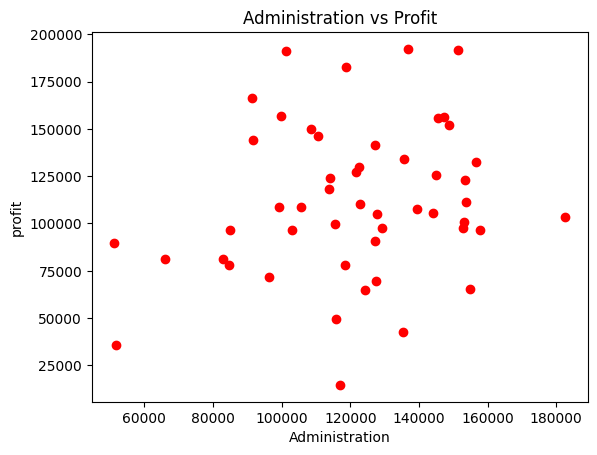

In [5]:
plt.scatter(dataset['Administration'],dataset['Profit'],color='red')
plt.title('Administration vs Profit')
plt.xlabel('Administration')
plt.ylabel('profit')
plt.show()


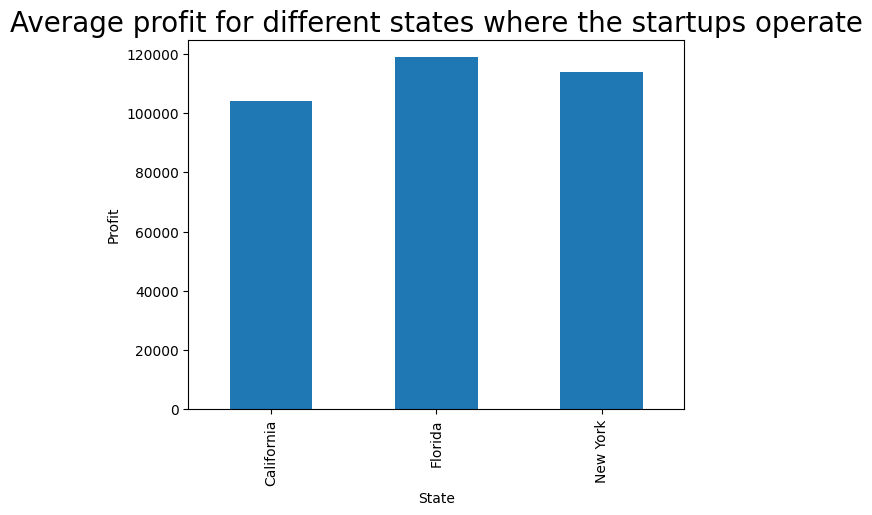

In [6]:
ax = dataset.groupby(['State'])['Profit'].mean().plot(kind='bar')
ax.set_title('Average profit for different states where the startups operate', fontsize = 20)
ax.set_xlabel('State')
ax.set_ylabel('Profit')
plt.show()


In [7]:
dataset.State.value_counts()

,count
State,
New York,17
California,17
Florida,16


In [8]:
# Create dummy variables for the categorical variable State

dataset['New York State']= np.where(dataset['State']== 'New York',1,0)
dataset['California State']= np.where(dataset['State']== 'California',1,0)
dataset['Florida State']= np.where(dataset['State']== 'Florida',1,0)


In [9]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,New York State,California State,Florida State
0,165349.20,136897.80,471784.10,New York,192261.83,1,0,0
1,162597.70,151377.59,443898.53,California,191792.06,0,1,0
2,153441.51,101145.55,407934.54,Florida,191050.39,0,0,1
3,144372.41,118671.85,383199.62,New York,182901.99,1,0,0
4,142107.34,91391.77,366168.42,Florida,166187.94,0,0,1


In [10]:
# removing the state column from the dataset

dataset = dataset.drop(['State'], axis = 1)


In [11]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,Profit,New York State,California State,Florida State
0,165349.20,136897.80,471784.10,192261.83,1,0,0
1,162597.70,151377.59,443898.53,191792.06,0,1,0
2,153441.51,101145.55,407934.54,191050.39,0,0,1
3,144372.41,118671.85,383199.62,182901.99,1,0,0
4,142107.34,91391.77,366168.42,166187.94,0,0,1


In [12]:
dataset.corr()

,R&D Spend,Administration,Marketing Spend,Profit,New York State,California State,Florida State
R&D Spend,1.000000,0.241955,0.724248,0.972900,0.039068,-0.143165,0.105711
Administration,0.241955,1.000000,-0.032154,0.200717,0.005145,-0.015478,0.010493
Marketing Spend,0.724248,-0.032154,1.000000,0.747766,-0.033670,-0.168875,0.205685
Profit,0.972900,0.200717,0.747766,1.000000,0.031368,-0.145837,0.116244
New York State,0.039068,0.005145,-0.033670,0.031368,1.000000,-0.515152,-0.492366
California State,-0.143165,-0.015478,-0.168875,-0.145837,-0.515152,1.000000,-0.492366
Florida State,0.105711,0.010493,0.205685,0.116244,-0.492366,-0.492366,1.000000


In [15]:
dependent_variable = dataset['Profit']
independent_variable = dataset.drop(['Profit'], axis = 1)

independent_variable.head()

,R&D Spend,Administration,Marketing Spend,New York State,California State,Florida State
0,165349.20,136897.80,471784.10,1,0,0
1,162597.70,151377.59,443898.53,0,1,0
2,153441.51,101145.55,407934.54,0,0,1
3,144372.41,118671.85,383199.62,1,0,0
4,142107.34,91391.77,366168.42,0,0,1


In [21]:
# creating data for x

X = independent_variable.values

# creating data for y

y = dependent_variable.values


In [22]:
y

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

In [23]:
# split the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
